In [1]:
import xarray
import netCDF4 as nc

poa_irradiance_folder = "../data/poa-irradiance"

height_data_path = "../data/satellite-data/height_data/NASADEM_NC.001_30m_aid0001.nc"

height_dataset = xarray.load_dataset(height_data_path)


In [2]:
height_dataset

<xarray.Dataset>
Dimensions:      (time: 1, lat: 4874, lon: 5063)
Coordinates:
  * time         (time) object 2000-02-11 00:00:00
  * lat          (lat) float64 -19.57 -19.57 -19.57 ... -20.92 -20.92 -20.92
  * lon          (lon) float64 56.94 56.94 56.94 56.94 ... 58.34 58.35 58.35
Data variables:
    crs          int8 -127
    NASADEM_HGT  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    title:        NASADEM_NC.001 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v2.66
    references:   See README.md
    history:      See README.md

In [2]:

import shapefile


def plot_map(sf, x_lim=None, y_lim=None):
    """
    Plot map with lim coordinates
    """
    _id = 0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')

        if (x_lim is None) & (y_lim is None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            # plt.text(x0, y0, _id, fontsize=10)
        _id += 1

    if (x_lim is not None) & (y_lim is not None):
        plt.xlim(x_lim)
        plt.ylim(y_lim)


sf = shapefile.Reader("../data/shapefiles/mauritius_coastline.shp")

In [5]:
df = height_dataset.to_dataframe().reset_index()

In [10]:
df = df[df['lon']>=57.3]
df = df[df['lon']<=57.84]
df = df[df['lat']>=-20.55]
df = df[df['lat']<=-19.95]
df = df[df.index % 10 == 0]

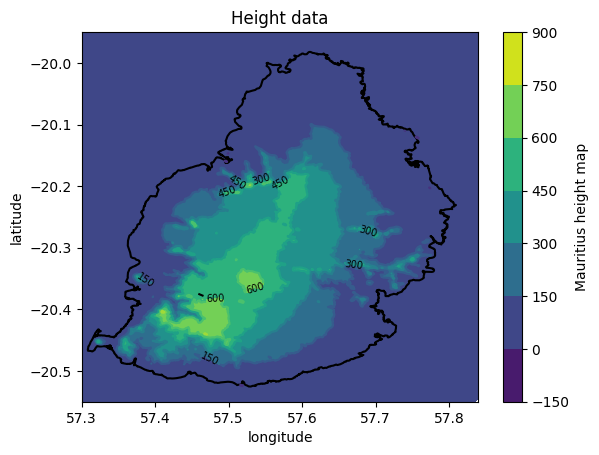

In [11]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot()
ax.set_title(f"Height data")
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
plot_map(sf)

# tcp = ax.tripcolor(df["Y"], df["X"], df["Z"], alpha=1, cmap='inferno', vmin=minimum_irradiance,
#                    vmax=maximum_irradiance)

contourf = ax.tricontourf(df['lon'], df['lat'], df['NASADEM_HGT'], )
contour = ax.tricontour(df['lon'], df['lat'], df['NASADEM_HGT'], )

ax.clabel(contour, inline=1, fontsize=7, colors='black')
plt.xlim([57.3, 57.84])
plt.ylim([-20.55, -19.95])
fig.colorbar(contourf, label='Mauritius height map')
plt.show()